Step 1: Import dependencies

In [1]:
# Import dependencies
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [2]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*5)
endDate, startDate


(datetime.datetime(2024, 1, 3, 12, 12, 22, 173768),
 datetime.datetime(2019, 1, 4, 12, 12, 22, 173768))

Stocks from different sectors

In [3]:
stocks = ["TSLA", "AAPL","AMZN","TXN","PFE","QCOM","AVGO","MU","XOM","AMAT"]


Different  Stocks in the same Inductry: Semiconductors Technology , 

# Download the stock data from Yahoo Finance

In [4]:
df = yf.download(stocks, start = startDate, end = endDate)

[*********************100%***********************]  10 of 10 completed


In [ ]:
df.info()

In [6]:
adj_close_price = df['Adj Close']

In [7]:
adj_close_price.head()

,AAPL,AMAT,AMZN,AVGO,MU,PFE,QCOM,TSLA,TXN,XOM
Date,,,,,,,,,,
2019-01-04,35.575394,31.829685,78.769501,197.604065,32.146591,33.696701,49.819218,21.179333,80.869377,55.093025
2019-01-07,35.496212,32.396385,81.475502,201.628555,33.424587,33.876938,49.678398,22.330667,82.262192,55.379517
2019-01-08,36.172878,31.083521,82.829002,200.010284,33.168987,34.033669,49.247097,22.356667,82.157730,55.782166
2019-01-09,36.787151,32.396385,82.971001,208.660721,34.840225,33.963127,49.828030,22.568666,83.776848,56.076408
2019-01-10,36.904724,32.830856,82.810997,211.405792,35.302269,33.155979,49.995270,22.997999,85.065193,55.789902


Calculate Daily Returns


In [9]:
log_returns = np.log(adj_close_price/adj_close_price.shift(1))
log_returns.head()

,AAPL,AMAT,AMZN,AVGO,MU,PFE,QCOM,TSLA,TXN,XOM
Date,,,,,,,,,,
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.002228,0.017647,0.033777,0.020162,0.038985,0.005335,-0.002831,0.052935,0.017076,0.005187
2019-01-08,0.018884,-0.041369,0.016476,-0.008058,-0.007676,0.004616,-0.008720,0.001164,-0.001271,0.007244
2019-01-09,0.016839,0.041369,0.001713,0.042341,0.049157,-0.002075,0.011727,0.009438,0.019516,0.005261
2019-01-10,0.003191,0.013322,-0.001930,0.013070,0.013175,-0.024052,0.003351,0.018845,0.015261,-0.005122


In [10]:
log_returns = np.log(adj_close_price/adj_close_price.shift(1))
log_returns = log_returns[1:]
log_returns.head()


,AAPL,AMAT,AMZN,AVGO,MU,PFE,QCOM,TSLA,TXN,XOM
Date,,,,,,,,,,
2019-01-07,-0.002228,0.017647,0.033777,0.020162,0.038985,0.005335,-0.002831,0.052935,0.017076,0.005187
2019-01-08,0.018884,-0.041369,0.016476,-0.008058,-0.007676,0.004616,-0.008720,0.001164,-0.001271,0.007244
2019-01-09,0.016839,0.041369,0.001713,0.042341,0.049157,-0.002075,0.011727,0.009438,0.019516,0.005261
2019-01-10,0.003191,0.013322,-0.001930,0.013070,0.013175,-0.024052,0.003351,0.018845,0.015261,-0.005122
2019-01-11,-0.009866,0.000575,-0.009500,0.004199,0.002781,0.013382,0.012248,0.006616,0.008863,-0.004590


Calculate the cumulative returns

In [11]:
cumulative_log_returns = log_returns.cumsum()

Plot the cumulative returns

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

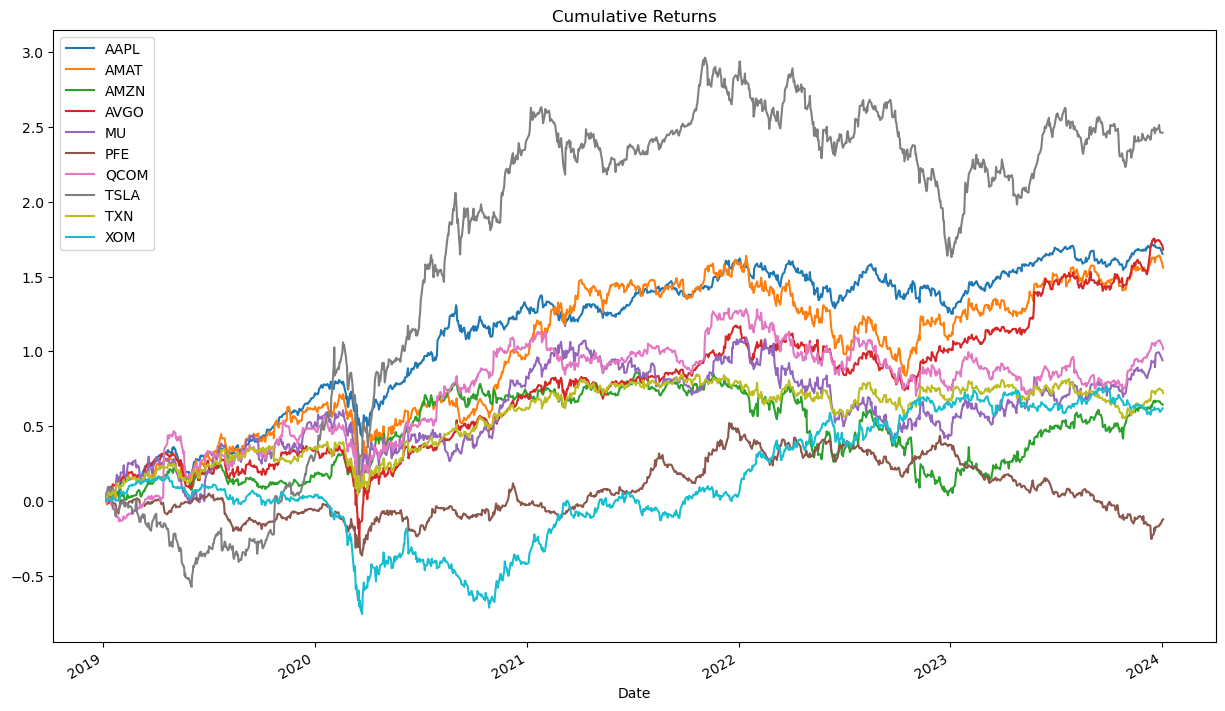

In [12]:
cumulative_log_returns.plot(title = "Cumulative Returns", figsize = (15,9))

Generate descriptives with pandas

In [13]:
log_returns.describe()

,AAPL,AMAT,AMZN,AVGO,MU,PFE,QCOM,TSLA,TXN,XOM
count,1256.000000,1257.000000,1256.000000,1257.000000,1256.000000,1257.000000,1257.000000,1256.000000,1257.000000,1256.000000
mean,0.001315,0.001241,0.000512,0.001337,0.000749,-0.000098,0.000807,0.001960,0.000573,0.000493
std,0.020097,0.028775,0.022141,0.023127,0.028705,0.016847,0.026134,0.040749,0.019572,0.021587
min,-0.137708,-0.227624,-0.151398,-0.222055,-0.220878,-0.080501,-0.161875,-0.236518,-0.125855,-0.130391
25%,-0.008240,-0.014030,-0.010916,-0.010313,-0.014298,-0.009170,-0.012486,-0.017710,-0.010132,-0.010898
50%,0.001416,0.001388,0.000919,0.001432,0.000489,-0.000531,0.000766,0.002172,0.000706,0.000486
75%,0.012328,0.017517,0.011988,0.013423,0.016663,0.008195,0.014639,0.021912,0.012027,0.011475
max,0.113157,0.120563,0.126949,0.146985,0.125235,0.103055,0.208699,0.181445,0.126892,0.119442


Create correlation matrix

In [14]:
log_returns.corr()

,AAPL,AMAT,AMZN,AVGO,MU,PFE,QCOM,TSLA,TXN,XOM
AAPL,1.000000,0.622398,0.621820,0.651518,0.544457,0.304303,0.626177,0.496831,0.655110,0.319463
AMAT,0.622398,1.000000,0.511026,0.758228,0.767216,0.253461,0.701900,0.460889,0.792676,0.380987
AMZN,0.621820,0.511026,1.000000,0.516828,0.452410,0.196191,0.510680,0.439066,0.523479,0.169401
AVGO,0.651518,0.758228,0.516828,1.000000,0.681742,0.269644,0.690363,0.469336,0.767690,0.386057
MU,0.544457,0.767216,0.452410,0.681742,1.000000,0.207923,0.630094,0.387256,0.709842,0.360616
PFE,0.304303,0.253461,0.196191,0.269644,0.207923,1.000000,0.214721,0.100921,0.306655,0.262478
QCOM,0.626177,0.701900,0.510680,0.690363,0.630094,0.214721,1.000000,0.419570,0.698242,0.319855
TSLA,0.496831,0.460889,0.439066,0.469336,0.387256,0.100921,0.419570,1.000000,0.411421,0.176321
TXN,0.655110,0.792676,0.523479,0.767690,0.709842,0.306655,0.698242,0.411421,1.000000,0.405629
XOM,0.319463,0.380987,0.169401,0.386057,0.360616,0.262478,0.319855,0.176321,0.405629,1.000000


In [15]:
log_returns.corr().round(2)

,AAPL,AMAT,AMZN,AVGO,MU,PFE,QCOM,TSLA,TXN,XOM
AAPL,1.00,0.62,0.62,0.65,0.54,0.30,0.63,0.50,0.66,0.32
AMAT,0.62,1.00,0.51,0.76,0.77,0.25,0.70,0.46,0.79,0.38
AMZN,0.62,0.51,1.00,0.52,0.45,0.20,0.51,0.44,0.52,0.17
AVGO,0.65,0.76,0.52,1.00,0.68,0.27,0.69,0.47,0.77,0.39
MU,0.54,0.77,0.45,0.68,1.00,0.21,0.63,0.39,0.71,0.36
PFE,0.30,0.25,0.20,0.27,0.21,1.00,0.21,0.10,0.31,0.26
QCOM,0.63,0.70,0.51,0.69,0.63,0.21,1.00,0.42,0.70,0.32
TSLA,0.50,0.46,0.44,0.47,0.39,0.10,0.42,1.00,0.41,0.18
TXN,0.66,0.79,0.52,0.77,0.71,0.31,0.70,0.41,1.00,0.41
XOM,0.32,0.38,0.17,0.39,0.36,0.26,0.32,0.18,0.41,1.00


<Axes: >

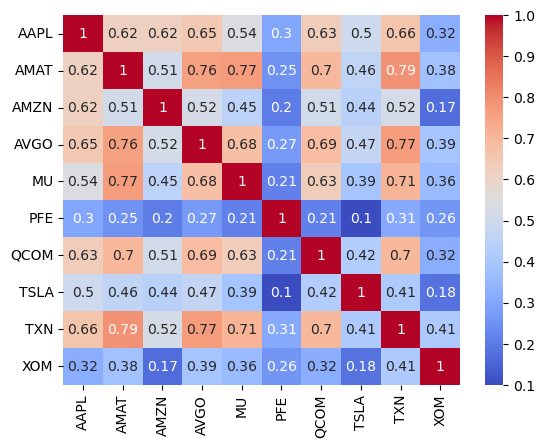

In [16]:
# display correlation matrix in heatmap
sns.heatmap(log_returns.corr().round(2), annot=True, cmap= 'coolwarm')

Graphical display correlation 

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(log_returns.corr().round(2), figsize=(16,12))

In [15]:
# stock_volume = df['Volume']
#stock_volume.head()

Two sectors 5 technology stocks and another 5 in oil Sector 

In [17]:
stocks2 = ["MSFT", "GOOG", "AAPL", "HPE", "CRM", "COP", "PSX", "OXY", "XOM", "CVX"]

Stock DataFrame

In [18]:
df = yf.download(stocks2, start = startDate, end = endDate)

[*********************100%***********************]  10 of 10 completed


In [19]:
df.head()

Adj Close                                                          \
                 AAPL        COP         CRM        CVX       GOOG        HPE   
Date                                                                            
2019-01-04  35.575386  53.254581  137.960007  88.939232  53.535500  11.659351   
2019-01-07  35.496201  53.020683  142.220001  90.094910  53.419498  11.887469   
2019-01-08  36.172871  53.730736  145.720001  89.701653  53.813999  11.659351   
2019-01-09  36.787155  55.510067  145.990005  90.905487  53.733002  11.879022   
2019-01-10  36.904728  56.754780  147.039993  91.049934  53.516499  11.938161   

                                                        ...     Volume  \
                 MSFT        OXY        PSX        XOM  ...       AAPL   
Date                                                    ...              
2019-01-04  96.792450  56.092354  73.343773  55.093018  ...  234428400   
2019-01-07  96.915894  57.219357  73.852425  55.379509  ...  219111200   
2019-01-08  97.618584  57.671928  73.787842  55.782169  ...  164101200   
2019-01-09  99.014488  58.372974  74.272285  56.076405  ...  180396400   
2019-01-10  98.378258  58.736809  75.039322  55.789917  ...  143122800   

                                                                              \
                COP      CRM      CVX      GOOG       HPE      MSFT      OXY   
Date                                                                           
2019-01-04  7700100  6650600  7952500  41878000  11277100  44060600  6367400   
2019-01-07  6272200  9064800  5712700  39638000   8027500  35656100  5771600   
2019-01-08  5774900  9057300  5674900  35298000  12732500  31514400  5420100   
2019-01-09  8350300  5445900  7097000  23986000   7668100  32280800  4515800   
2019-01-10  8811100  5116900  6078300  29128000   8556200  30067600  4983200   

                               
                PSX       XOM  
Date                           
2019-01-04  3307200  16043600  
2019-01-07  3474000  10844200  
2019-01-08  2357300  11439000  
2019-01-09  2588600  13473500  
2019-01-10  2323700  13151100  

[5 rows x 60 columns]

In [ ]:
df.info()

Used Adjusted Close price as it accounts for dividends and stock splits

In [23]:
adj_close_price = df["Adj Close"]

In [25]:
adj_close_price.head()

,AAPL,COP,CRM,CVX,GOOG,HPE,MSFT,OXY,PSX,XOM
Date,,,,,,,,,,
2019-01-04,35.575386,53.254581,137.960007,88.939232,53.535500,11.659351,96.792450,56.092354,73.343773,55.093018
2019-01-07,35.496201,53.020683,142.220001,90.094910,53.419498,11.887469,96.915894,57.219357,73.852425,55.379509
2019-01-08,36.172871,53.730736,145.720001,89.701653,53.813999,11.659351,97.618584,57.671928,73.787842,55.782169
2019-01-09,36.787155,55.510067,145.990005,90.905487,53.733002,11.879022,99.014488,58.372974,74.272285,56.076405
2019-01-10,36.904728,56.754780,147.039993,91.049934,53.516499,11.938161,98.378258,58.736809,75.039322,55.789917


Daily price earnings is the difference between the price at time (t) compared with the price the previous day (t-1)

In [26]:
log_returns = np.log(adj_close_price/adj_close_price.shift(1))

In [27]:
log_returns.head()

,AAPL,COP,CRM,CVX,GOOG,HPE,MSFT,OXY,PSX,XOM
Date,,,,,,,,,,
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.002228,-0.004402,0.030411,0.012910,-0.002169,0.019376,0.001275,0.019893,0.006911,0.005187
2019-01-08,0.018884,0.013303,0.024312,-0.004374,0.007358,-0.019376,0.007224,0.007878,-0.000875,0.007245
2019-01-09,0.016839,0.032579,0.001851,0.013331,-0.001506,0.018665,0.014198,0.012082,0.006544,0.005261
2019-01-10,0.003191,0.022175,0.007166,0.001588,-0.004037,0.004966,-0.006446,0.006214,0.010274,-0.005122


In [29]:

log_returns = log_returns[1:]
log_returns.head()

,AAPL,COP,CRM,CVX,GOOG,HPE,MSFT,OXY,PSX,XOM
Date,,,,,,,,,,
2019-01-08,0.018884,0.013303,0.024312,-0.004374,0.007358,-0.019376,0.007224,0.007878,-0.000875,0.007245
2019-01-09,0.016839,0.032579,0.001851,0.013331,-0.001506,0.018665,0.014198,0.012082,0.006544,0.005261
2019-01-10,0.003191,0.022175,0.007166,0.001588,-0.004037,0.004966,-0.006446,0.006214,0.010274,-0.005122
2019-01-11,-0.009867,-0.023079,0.003463,-0.008053,-0.012353,0.007755,-0.007752,0.000453,-0.002694,-0.004591
2019-01-14,-0.015152,-0.011818,-0.010218,-0.007313,-0.011894,-0.005634,-0.007322,-0.009712,0.001509,-0.001256


In [31]:
cumulative_log_returns = log_returns.cumsum()

<Axes: title={'center': 'Cumulative Price Returns'}, xlabel='Date'>

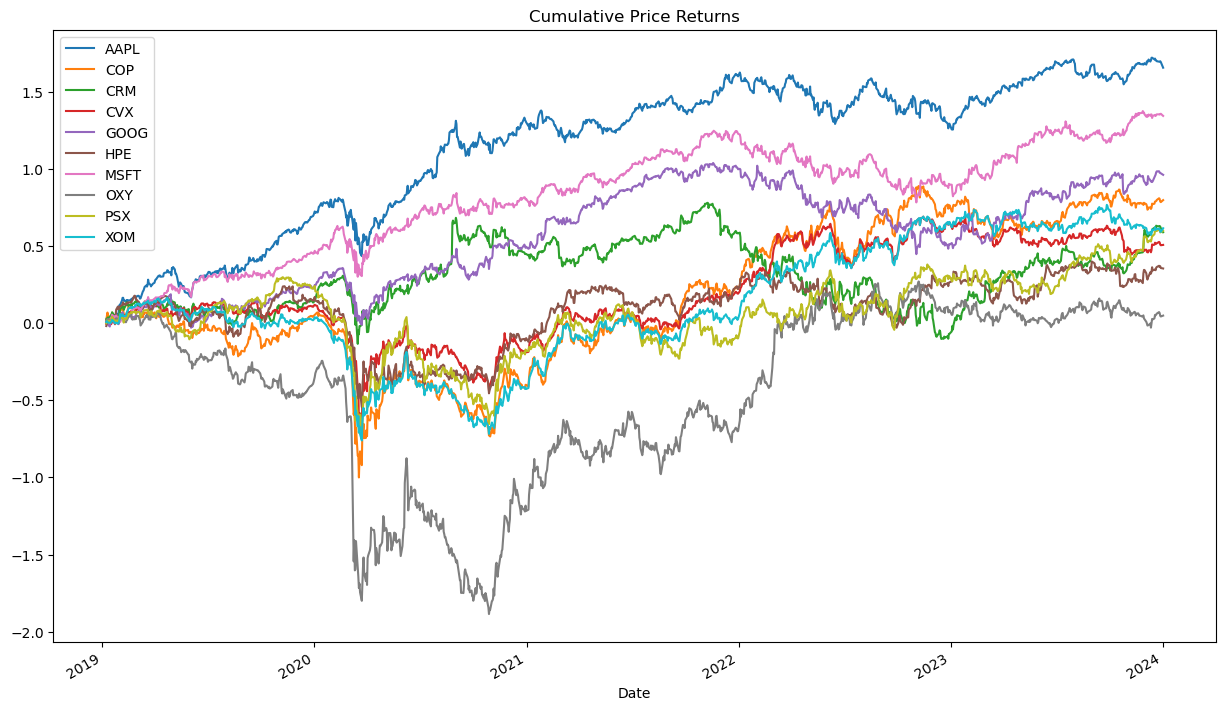

In [34]:
cumulative_log_returns.plot(title = "Cumulative Price Returns", figsize = (15,9))

In [35]:
log_returns.describe()

,AAPL,COP,CRM,CVX,GOOG,HPE,MSFT,OXY,PSX,XOM
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,0.001318,0.000635,0.000469,0.000403,0.000765,0.000282,0.001069,0.000038,0.000476,0.000489
std,0.020104,0.028308,0.023987,0.022533,0.020005,0.022950,0.019164,0.041969,0.026583,0.021595
min,-0.137708,-0.285552,-0.173027,-0.250062,-0.117667,-0.166225,-0.159453,-0.734257,-0.172757,-0.130391
25%,-0.008243,-0.012741,-0.011094,-0.008890,-0.008724,-0.010884,-0.008390,-0.016128,-0.010912,-0.010913
50%,0.001422,0.000296,0.000861,0.000700,0.001134,0.001756,0.001167,-0.000339,0.000681,0.000481
75%,0.012337,0.014309,0.013207,0.009825,0.010903,0.012024,0.011089,0.016426,0.014072,0.011477
max,0.113157,0.224853,0.231468,0.204904,0.099380,0.132573,0.132929,0.290411,0.200262,0.119442


In [36]:
log_returns.corr()

,AAPL,COP,CRM,CVX,GOOG,HPE,MSFT,OXY,PSX,XOM
AAPL,1.000000,0.320637,0.576837,0.359116,0.675999,0.459507,0.761128,0.272489,0.302052,0.319504
COP,0.320637,1.000000,0.281316,0.849409,0.323172,0.516588,0.309571,0.771651,0.763040,0.843954
CRM,0.576837,0.281316,1.000000,0.294141,0.582965,0.348162,0.667507,0.225112,0.257657,0.243498
CVX,0.359116,0.849409,0.294141,1.000000,0.348711,0.526088,0.356859,0.690604,0.749051,0.855465
GOOG,0.675999,0.323172,0.582965,0.348711,1.000000,0.404031,0.754189,0.277788,0.310981,0.301348
HPE,0.459507,0.516588,0.348162,0.526088,0.404031,1.000000,0.428573,0.462754,0.584327,0.527255
MSFT,0.761128,0.309571,0.667507,0.356859,0.754189,0.428573,1.000000,0.255112,0.296856,0.282428
OXY,0.272489,0.771651,0.225112,0.690604,0.277788,0.462754,0.255112,1.000000,0.654439,0.726346
PSX,0.302052,0.763040,0.257657,0.749051,0.310981,0.584327,0.296856,0.654439,1.000000,0.777272
XOM,0.319504,0.843954,0.243498,0.855465,0.301348,0.527255,0.282428,0.726346,0.777272,1.000000


In [37]:
log_returns.corr().round(2)

,AAPL,COP,CRM,CVX,GOOG,HPE,MSFT,OXY,PSX,XOM
AAPL,1.00,0.32,0.58,0.36,0.68,0.46,0.76,0.27,0.30,0.32
COP,0.32,1.00,0.28,0.85,0.32,0.52,0.31,0.77,0.76,0.84
CRM,0.58,0.28,1.00,0.29,0.58,0.35,0.67,0.23,0.26,0.24
CVX,0.36,0.85,0.29,1.00,0.35,0.53,0.36,0.69,0.75,0.86
GOOG,0.68,0.32,0.58,0.35,1.00,0.40,0.75,0.28,0.31,0.30
HPE,0.46,0.52,0.35,0.53,0.40,1.00,0.43,0.46,0.58,0.53
MSFT,0.76,0.31,0.67,0.36,0.75,0.43,1.00,0.26,0.30,0.28
OXY,0.27,0.77,0.23,0.69,0.28,0.46,0.26,1.00,0.65,0.73
PSX,0.30,0.76,0.26,0.75,0.31,0.58,0.30,0.65,1.00,0.78
XOM,0.32,0.84,0.24,0.86,0.30,0.53,0.28,0.73,0.78,1.00


<Axes: >

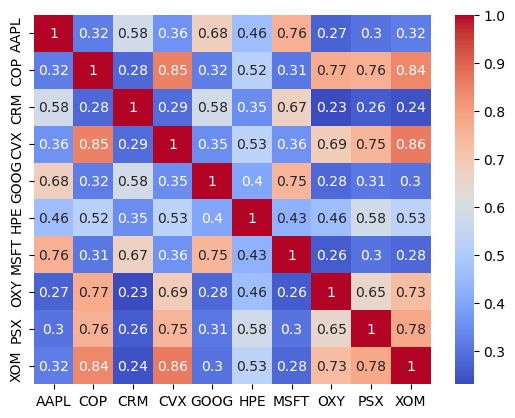

In [38]:
# display correlation matrix in heatmap
sns.heatmap(log_returns.corr().round(2), annot=True, cmap= 'coolwarm')

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(log_returns.corr().round(2), figsize = (14,8))


In [40]:
stocks3 = ["MSFT", "GOOG", "AAPL", "HD", "ADBE", "OXY", "XOM", "CVX"]

In [41]:
df = yf.download(stocks3, start = startDate, end = endDate)

[*********************100%***********************]  8 of 8 completed


In [42]:
df.head()

Adj Close                                                \
                 AAPL        ADBE        CVX       GOOG          HD   
Date                                                                  
2019-01-04  35.575390  226.190002  88.939232  53.535500  153.501221   
2019-01-07  35.496201  229.259995  90.094917  53.419498  156.524841   
2019-01-08  36.172878  232.679993  89.701660  53.813999  157.276352   
2019-01-09  36.787151  235.429993  90.905502  53.733002  158.903137   
2019-01-10  36.904732  237.770004  91.049942  53.516499  158.310822   

                                                 Close              ...  \
                 MSFT        OXY        XOM       AAPL        ADBE  ...   
Date                                                                ...   
2019-01-04  96.792435  56.092369  55.093010  37.064999  226.190002  ...   
2019-01-07  96.915894  57.219349  55.379517  36.982498  229.259995  ...   
2019-01-08  97.618576  57.671921  55.782169  37.687500  232.679993  ...   
2019-01-09  99.014511  58.372982  56.076408  38.327499  235.429993  ...   
2019-01-10  98.378250  58.736813  55.789917  38.450001  237.770004  ...   

                 Open                Volume                              \
                  OXY        XOM       AAPL     ADBE      CVX      GOOG   
Date                                                                      
2019-01-04  62.279999  69.639999  234428400  4043400  7952500  41878000   
2019-01-07  63.549999  71.250000  219111200  3638500  5712700  39638000   
2019-01-08  65.300003  72.540001  164101200  3685900  5674900  35298000   
2019-01-09  65.480003  72.599998  180396400  3594200  7097000  23986000   
2019-01-10  65.809998  72.070000  143122800  2704600  6078300  29128000   

                                                  
                 HD      MSFT      OXY       XOM  
Date                                              
2019-01-04  4762600  44060600  6367400  16043600  
2019-01-07  4928800  35656100  5771600  10844200  
2019-01-08  4722400  31514400  5420100  11439000  
2019-01-09  4922000  32280800  4515800  13473500  
2019-01-10  3605300  30067600  4983200  13151100  

[5 rows x 48 columns]

In [ ]:
df.info()

In [44]:
adj_close_price = df["Adj Close"]

In [45]:
adj_close_price.head()

,AAPL,ADBE,CVX,GOOG,HD,MSFT,OXY,XOM
Date,,,,,,,,
2019-01-04,35.575390,226.190002,88.939232,53.535500,153.501221,96.792435,56.092369,55.093010
2019-01-07,35.496201,229.259995,90.094917,53.419498,156.524841,96.915894,57.219349,55.379517
2019-01-08,36.172878,232.679993,89.701660,53.813999,157.276352,97.618576,57.671921,55.782169
2019-01-09,36.787151,235.429993,90.905502,53.733002,158.903137,99.014511,58.372982,56.076408
2019-01-10,36.904732,237.770004,91.049942,53.516499,158.310822,98.378250,58.736813,55.789917


In [46]:
log_returns = np.log(adj_close_price/adj_close_price.shift(1))

Daily earnings

In [47]:
log_returns.head()

,AAPL,ADBE,CVX,GOOG,HD,MSFT,OXY,XOM
Date,,,,,,,,
2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,-0.002228,0.013481,0.012910,-0.002169,0.019506,0.001275,0.019892,0.005187
2019-01-08,0.018884,0.014807,-0.004374,0.007358,0.004790,0.007224,0.007878,0.007244
2019-01-09,0.016839,0.011750,0.013331,-0.001506,0.010290,0.014199,0.012083,0.005261
2019-01-10,0.003191,0.009890,0.001588,-0.004037,-0.003734,-0.006447,0.006214,-0.005122


In [48]:
log_returns = log_returns[1:]

In [49]:
log_returns.head()

,AAPL,ADBE,CVX,GOOG,HD,MSFT,OXY,XOM
Date,,,,,,,,
2019-01-07,-0.002228,0.013481,0.012910,-0.002169,0.019506,0.001275,0.019892,0.005187
2019-01-08,0.018884,0.014807,-0.004374,0.007358,0.004790,0.007224,0.007878,0.007244
2019-01-09,0.016839,0.011750,0.013331,-0.001506,0.010290,0.014199,0.012083,0.005261
2019-01-10,0.003191,0.009890,0.001588,-0.004037,-0.003734,-0.006447,0.006214,-0.005122
2019-01-11,-0.009867,-0.000926,-0.008053,-0.012353,0.001953,-0.007752,0.000453,-0.004591


Cumulative Returns

In [50]:
Cumulative_log_returns = log_returns.cumsum() 

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

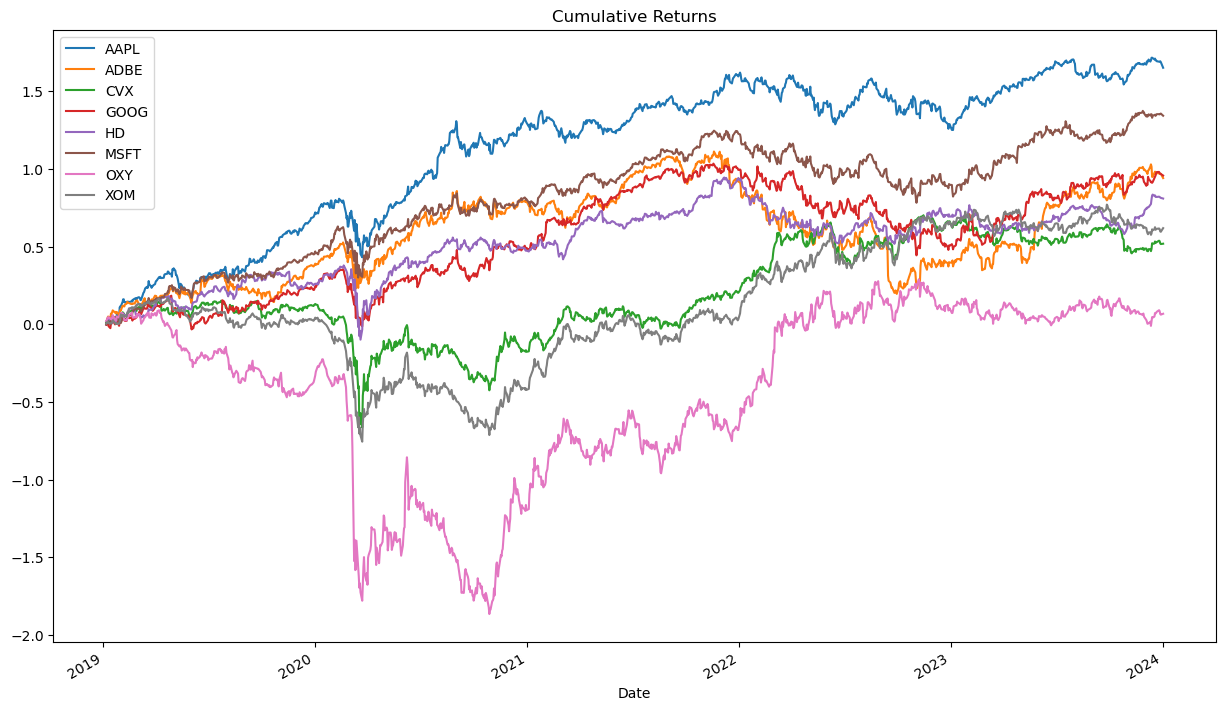

In [51]:
Cumulative_log_returns.plot(title = "Cumulative Returns", figsize = (15,9))

In [52]:
log_returns.describe()

,AAPL,ADBE,CVX,GOOG,HD,MSFT,OXY,XOM
count,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000,1256.000000
mean,0.001315,0.000750,0.000413,0.000763,0.000645,0.001069,0.000054,0.000493
std,0.020097,0.023277,0.022527,0.019997,0.018181,0.019156,0.041956,0.021587
min,-0.137708,-0.183841,-0.250062,-0.117667,-0.220570,-0.159453,-0.734257,-0.130391
25%,-0.008240,-0.010252,-0.008878,-0.008700,-0.007346,-0.008367,-0.016118,-0.010898
50%,0.001416,0.001725,0.000714,0.001106,0.001410,0.001208,-0.000318,0.000486
75%,0.012328,0.013119,0.009863,0.010888,0.009176,0.011087,0.016454,0.011475
max,0.113157,0.163133,0.204903,0.099380,0.128840,0.132929,0.290412,0.119442


In [53]:
log_returns.corr()

,AAPL,ADBE,CVX,GOOG,HD,MSFT,OXY,XOM
AAPL,1.000000,0.668830,0.358989,0.676006,0.577496,0.761117,0.272394,0.319463
ADBE,0.668830,1.000000,0.267705,0.668353,0.549963,0.770350,0.215611,0.213636
CVX,0.358989,0.267705,1.000000,0.348600,0.440486,0.356820,0.690666,0.855441
GOOG,0.676006,0.668353,0.348600,1.000000,0.518905,0.754181,0.277706,0.301314
HD,0.577496,0.549963,0.440486,0.518905,1.000000,0.604088,0.286912,0.349804
MSFT,0.761117,0.770350,0.356820,0.754181,0.604088,1.000000,0.255093,0.282425
OXY,0.272394,0.215611,0.690666,0.277706,0.286912,0.255093,1.000000,0.726350
XOM,0.319463,0.213636,0.855441,0.301314,0.349804,0.282425,0.726350,1.000000


In [54]:
log_returns.corr().round(2)

,AAPL,ADBE,CVX,GOOG,HD,MSFT,OXY,XOM
AAPL,1.00,0.67,0.36,0.68,0.58,0.76,0.27,0.32
ADBE,0.67,1.00,0.27,0.67,0.55,0.77,0.22,0.21
CVX,0.36,0.27,1.00,0.35,0.44,0.36,0.69,0.86
GOOG,0.68,0.67,0.35,1.00,0.52,0.75,0.28,0.30
HD,0.58,0.55,0.44,0.52,1.00,0.60,0.29,0.35
MSFT,0.76,0.77,0.36,0.75,0.60,1.00,0.26,0.28
OXY,0.27,0.22,0.69,0.28,0.29,0.26,1.00,0.73
XOM,0.32,0.21,0.86,0.30,0.35,0.28,0.73,1.00


<Axes: >

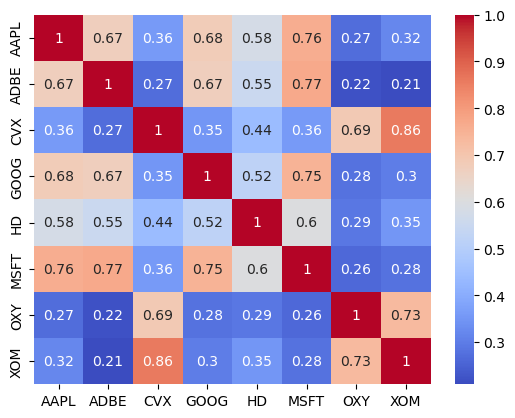

In [55]:
# display correlation matrix in heatmap
sns.heatmap(log_returns.corr().round(2), annot=True, cmap= 'coolwarm')

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(log_returns.corr().round(2), figsize = (15,9))